# Emotion Recognition

This project is about an emotion detection system using transfer learning techniques. The primary objective is to develop a deep learning model that can accurately classify human emotions based on facial images.It has broad applications, from enhancing human-computer interaction and personalizing user experiences to aiding mental health monitoring and bolstering sentiment analysis for business insights.<br><br>
**About Dataset**<br>
[Face expression recognition dataset](https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset)<br>
This Dataset from Kaggle consists of a diverse collection of facial images, each annotated with the emotion expressed by the subject. It has 28820 training images and 7066 testing images

##  Installing and Importing Libraries

In [3]:
!pip install augmentor
!pip install pydot
!pip install graphviz
!pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.6 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile
import random
import Augmentor
import cv2
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, GlobalMaxPooling2D, Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.inception_v3 import InceptionV3
from efficientnet.tfkeras import EfficientNetB0
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn import set_config
from keras.utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

100% 120M/121M [00:00<00:00, 162MB/s] 
100% 121M/121M [00:00<00:00, 140MB/s]


In [ ]:
dataset_path = '/content/drive/MyDrive/emotion_detection/data/archive.zip'
extraction_path = '/content/drive/MyDrive/emotion_detection/data/'

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
train_dir = '/content/drive/MyDrive/emotion_detection/data/images/train'
test_dir = '/content/drive/MyDrive/emotion_detection/data/images/test'

## Data Description

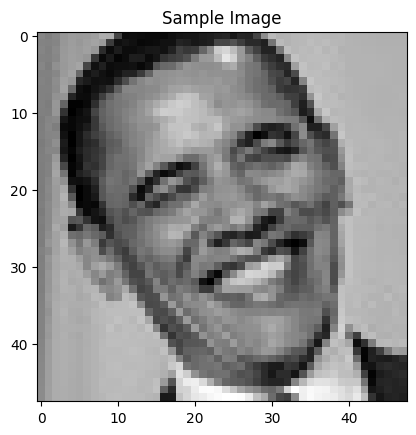

In [ ]:
# Sample Image
image_path = '/content/drive/MyDrive/emotion_detection/data/images/train/happy/10000.jpg'
img = mpimg.imread(image_path)
plt.imshow(img, cmap='gray')
plt.title('Sample Image')
plt.show()

In [ ]:
image_path = '/content/drive/MyDrive/emotion_detection/data/images/train/happy/10000.jpg'
img = mpimg.imread(image_path)
img.shape

(48, 48)

In [ ]:
# number of channels
image = cv2.imread('/content/drive/MyDrive/emotion_detection/data/images/train/happy/10000.jpg')
image.shape[2] if len(image.shape) == 3 else 1

3

In [ ]:
def plot_no_of_images(training_folder):
    categories = []
    image_counts = []

    for category in os.listdir(training_folder):
        category_path = os.path.join(training_folder, category)
        if os.path.isdir(category_path):
            categories.append(category)
            image_count = len(os.listdir(category_path))
            image_counts.append(image_count)

    plt.figure(figsize=(10, 6))
    plt.bar(categories, image_counts, color='royalblue', width=0.5)
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Category')
    plt.xticks(rotation=45, fontsize=10)
    plt.show()

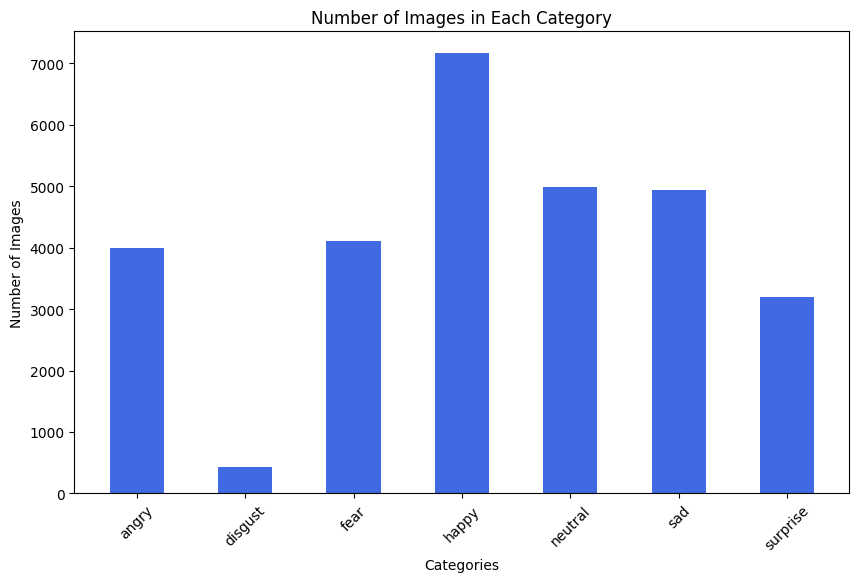

In [ ]:
plot_no_of_images(train_dir)

As we can see from the above graph that there is an imbalance in the data. To encounter this problem Data Augmentation is done. Data Augmentation includes creating new images from existing ones by rotating, shifting or flipping the images

## Data Augmentation

In [ ]:
def augment_data(folder, num_of_images, ):
    p = Augmentor.Pipeline(folder, folder)

    p.rotate(probability=0.7, max_left_rotation=25, max_right_rotation=25)
    p.flip_left_right(probability=0.5)
    p.random_contrast(probability=0.5, min_factor=0.5, max_factor=1.5)
    p.random_brightness(probability=0.5, min_factor=0.7, max_factor=1.3)

    p.sample(num_of_images)

    print(f"{num_of_images} augmented images have been saved to {folder}.")

In [ ]:
angry_folder = '/content/drive/MyDrive/emotion_detection/data/images/train/angry'
augment_data(angry_folder, 3000)

Initialised with 3993 image(s) found.
Output directory set to /content/drive/MyDrive/emotion_detection/data/images/train/angry.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7CD71CEF3F10>: 100%|██████████| 3000/3000 [00:31<00:00, 94.22 Samples/s]

3000 augmented images have been saved to /content/drive/MyDrive/emotion_detection/data/images/train/angry.


In [ ]:
disgust_folder = '/content/drive/MyDrive/emotion_detection/data/images/train/disgust'
augment_data(disgust_folder, 6500)

Initialised with 436 image(s) found.
Output directory set to /content/drive/MyDrive/emotion_detection/data/images/train/disgust.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7CD71CA9B760>: 100%|██████████| 6500/6500 [01:24<00:00, 77.14 Samples/s]

6500 augmented images have been saved to /content/drive/MyDrive/emotion_detection/data/images/train/disgust.


In [ ]:
fear_folder = '/content/drive/MyDrive/emotion_detection/data/images/train/fear'
augment_data(fear_folder, 3000)

Initialised with 4103 image(s) found.
Output directory set to /content/drive/MyDrive/emotion_detection/data/images/train/fear.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7CD724103C70>: 100%|██████████| 3000/3000 [00:47<00:00, 62.56 Samples/s]

3000 augmented images have been saved to /content/drive/MyDrive/emotion_detection/data/images/train/fear.


In [ ]:
neutral_folder = '/content/drive/MyDrive/emotion_detection/data/images/train/neutral'
augment_data(neutral_folder, 2000)

Initialised with 4982 image(s) found.
Output directory set to /content/drive/MyDrive/emotion_detection/data/images/train/neutral.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7CD724A70850>: 100%|██████████| 2000/2000 [00:20<00:00, 95.52 Samples/s]

2000 augmented images have been saved to /content/drive/MyDrive/emotion_detection/data/images/train/neutral.


In [ ]:
sad_folder = '/content/drive/MyDrive/emotion_detection/data/images/train/sad'
augment_data(sad_folder, 2000)

Initialised with 4938 image(s) found.
Output directory set to /content/drive/MyDrive/emotion_detection/data/images/train/sad.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7CD724A13310>: 100%|██████████| 2000/2000 [00:21<00:00, 94.55 Samples/s]

2000 augmented images have been saved to /content/drive/MyDrive/emotion_detection/data/images/train/sad.


In [ ]:
surprise_folder = '/content/drive/MyDrive/emotion_detection/data/images/train/surprise'
augment_data(surprise_folder, 3500)

Initialised with 3205 image(s) found.
Output directory set to /content/drive/MyDrive/emotion_detection/data/images/train/surprise.

Processing <PIL.Image.Image image mode=L size=48x48 at 0x7CD71CFBF9A0>: 100%|██████████| 3500/3500 [00:36<00:00, 95.38 Samples/s] 

3500 augmented images have been saved to /content/drive/MyDrive/emotion_detection/data/images/train/surprise.


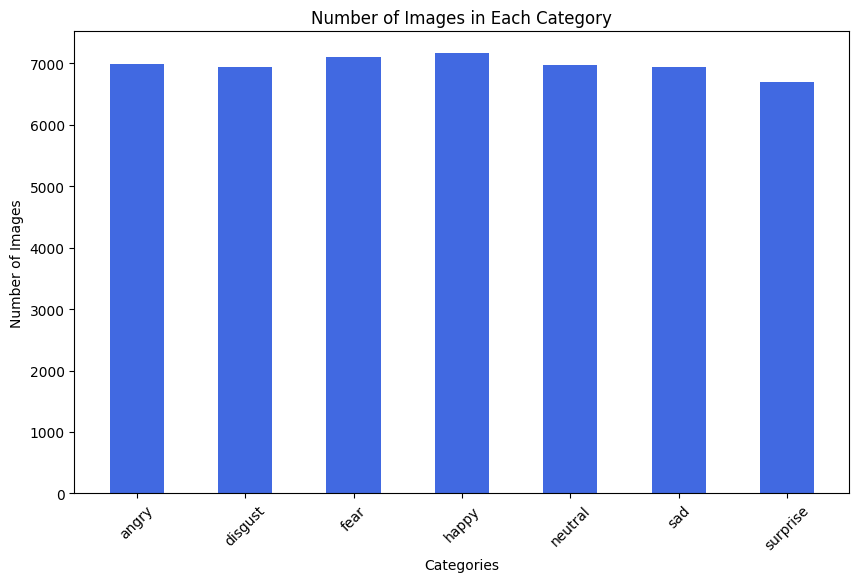

In [ ]:
plot_no_of_images(train_dir)

Now all the images of each class are almost equal. The size of training dataset in 48820 hence we can proceed to modelling

## Creating Dataframes

In [ ]:
train_data = []
test_data = []

def get_data(directory):
    data = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            if filename.endswith('.jpg'):
                image_path = os.path.join(label_dir, filename)
                data.append({'label': label, 'path': image_path})
    return data

In [ ]:
train_df = pd.DataFrame(get_data(train_dir))
test_df = pd.DataFrame(get_data(test_dir))

In [ ]:
train_df.head()

,label,path
0,angry,/content/drive/MyDrive/emotion_detection/data/...
1,angry,/content/drive/MyDrive/emotion_detection/data/...
2,angry,/content/drive/MyDrive/emotion_detection/data/...
3,angry,/content/drive/MyDrive/emotion_detection/data/...
4,angry,/content/drive/MyDrive/emotion_detection/data/...


In [ ]:
test_df.head()

,label,path
0,angry,/content/drive/MyDrive/emotion_detection/data/...
1,angry,/content/drive/MyDrive/emotion_detection/data/...
2,angry,/content/drive/MyDrive/emotion_detection/data/...
3,angry,/content/drive/MyDrive/emotion_detection/data/...
4,angry,/content/drive/MyDrive/emotion_detection/data/...


In [ ]:
train_df.shape

(48820, 2)

In [ ]:
test_df.shape

(7066, 2)

In [ ]:
test_df['label'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
img_width, img_height = 48, 48
batch_size = 64
y_col = 'label'
x_col = 'path'
no_of_classes = len(train_df[y_col].unique())

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/emotion_detection/data/images/train",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical")

Found 48820 files belonging to 7 classes.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "/content/drive/MyDrive/emotion_detection/data/images/test",
  image_size=(img_height, img_width),
  batch_size=batch_size,
  label_mode="categorical")

Found 7066 files belonging to 7 classes.


## ResNet50<br>

ResNet-50, short for "Residual Network 50," is a deep Convolutional Neural Network architecture. It is renowned for its depth, utilizing skip connections to combat the vanishing gradient problem, making it exceptionally effective in various computer vision tasks, such as image classification, object detection, and feature extraction.

### Modelling

In [ ]:
resnet_model = tf.keras.models.Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(48,48,3),
                   pooling='max',classes=no_of_classes,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=True

resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07)))
resnet_model.add(tf.keras.layers.Dropout(0.6))
resnet_model.add(tf.keras.layers.Dense(24, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.07)))
resnet_model.add(tf.keras.layers.Dense(7, activation='softmax'))

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 24)                49176     
                                                                 
 dropout_7 (Dropout)         (None, 24)                0         
                                                                 
 dense_4 (Dense)             (None, 24)                600       
                                                                 
 dense_5 (Dense)             (None, 7)                 175       
                                                                 
Total params: 23637663 (90.17 MB)
Trainable params: 23

In [ ]:
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

In [ ]:
epochs = 20

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

In [ ]:
resnet_history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stopping]
)

Epoch 1/20
763/763 [==============================] - 137s 121ms/step - loss: 2.2862 - accuracy: 0.3278 - val_loss: 1.8160 - val_accuracy: 0.3276
Epoch 2/20
763/763 [==============================] - 87s 114ms/step - loss: 1.5219 - accuracy: 0.4318 - val_loss: 1.7572 - val_accuracy: 0.3273
Epoch 3/20
763/763 [==============================] - 88s 115ms/step - loss: 1.4281 - accuracy: 0.4696 - val_loss: 1.3764 - val_accuracy: 0.5054
Epoch 4/20
763/763 [==============================] - 89s 116ms/step - loss: 1.3655 - accuracy: 0.4961 - val_loss: 1.5567 - val_accuracy: 0.4469
Epoch 5/20
763/763 [==============================] - 140s 183ms/step - loss: 1.3099 - accuracy: 0.5136 - val_loss: 1.3703 - val_accuracy: 0.5143
Epoch 6/20
763/763 [==============================] - 175s 228ms/step - loss: 1.2604 - accuracy: 0.5306 - val_loss: 1.5244 - val_accuracy: 0.4830
Epoch 7/20
763/763 [==============================] - 88s 115ms/step - loss: 1.2117 - accuracy: 0.5531 - val_loss: 1.4384 - val

In [ ]:
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(val_ds)
print(f"Test Loss: {resnet_test_loss}, Test Accuracy: {resnet_test_accuracy * 100:.2f}%")

111/111 [==============================] - 8s 70ms/step - loss: 1.3703 - accuracy: 0.5143
Test Loss: 1.370344638824463, Test Accuracy: 51.43%


In [ ]:
resnet_model.save('resnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


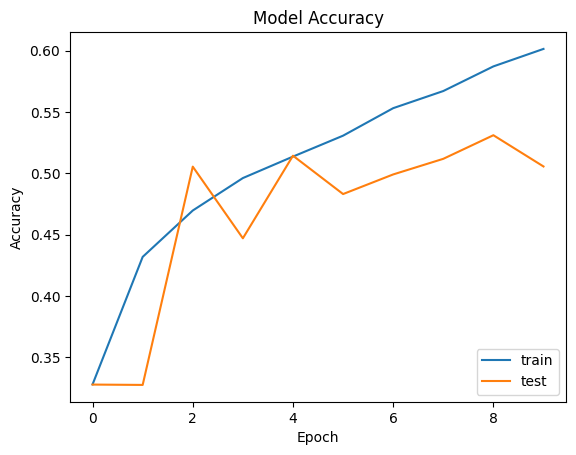

In [ ]:
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Testing

In [ ]:
def test_model(model):
    prefix = "/content/drive/MyDrive/emotion_detection/data/images/test"

    classes = os.listdir(prefix)

    choices = []

    for i in range(6):
        temp = {}
        for j in range(5):
            ch = random.choice(classes)
            li = os.listdir(prefix+"/"+ch)
            file_ = prefix+"/"+ch+"/"+random.choice(li)
            temp[file_] = ch
        choices.append(temp)


    plt.figure(figsize=(20, 20))
    n = 4
    im = 8
    ct = 1
    for row in choices:
        for i in row:
            ax = plt.subplot(im, n, ct)
            ct = ct + 1
            image =  cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)
            image = np.expand_dims(image, 0)
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            ax.set_title("True: {}, Predicted:{}".format(row[i], train_ds.class_names[np.argmax(model.predict(image)[0])]))
    plt.show()

1/1 [==============================] - 0s 24ms/step


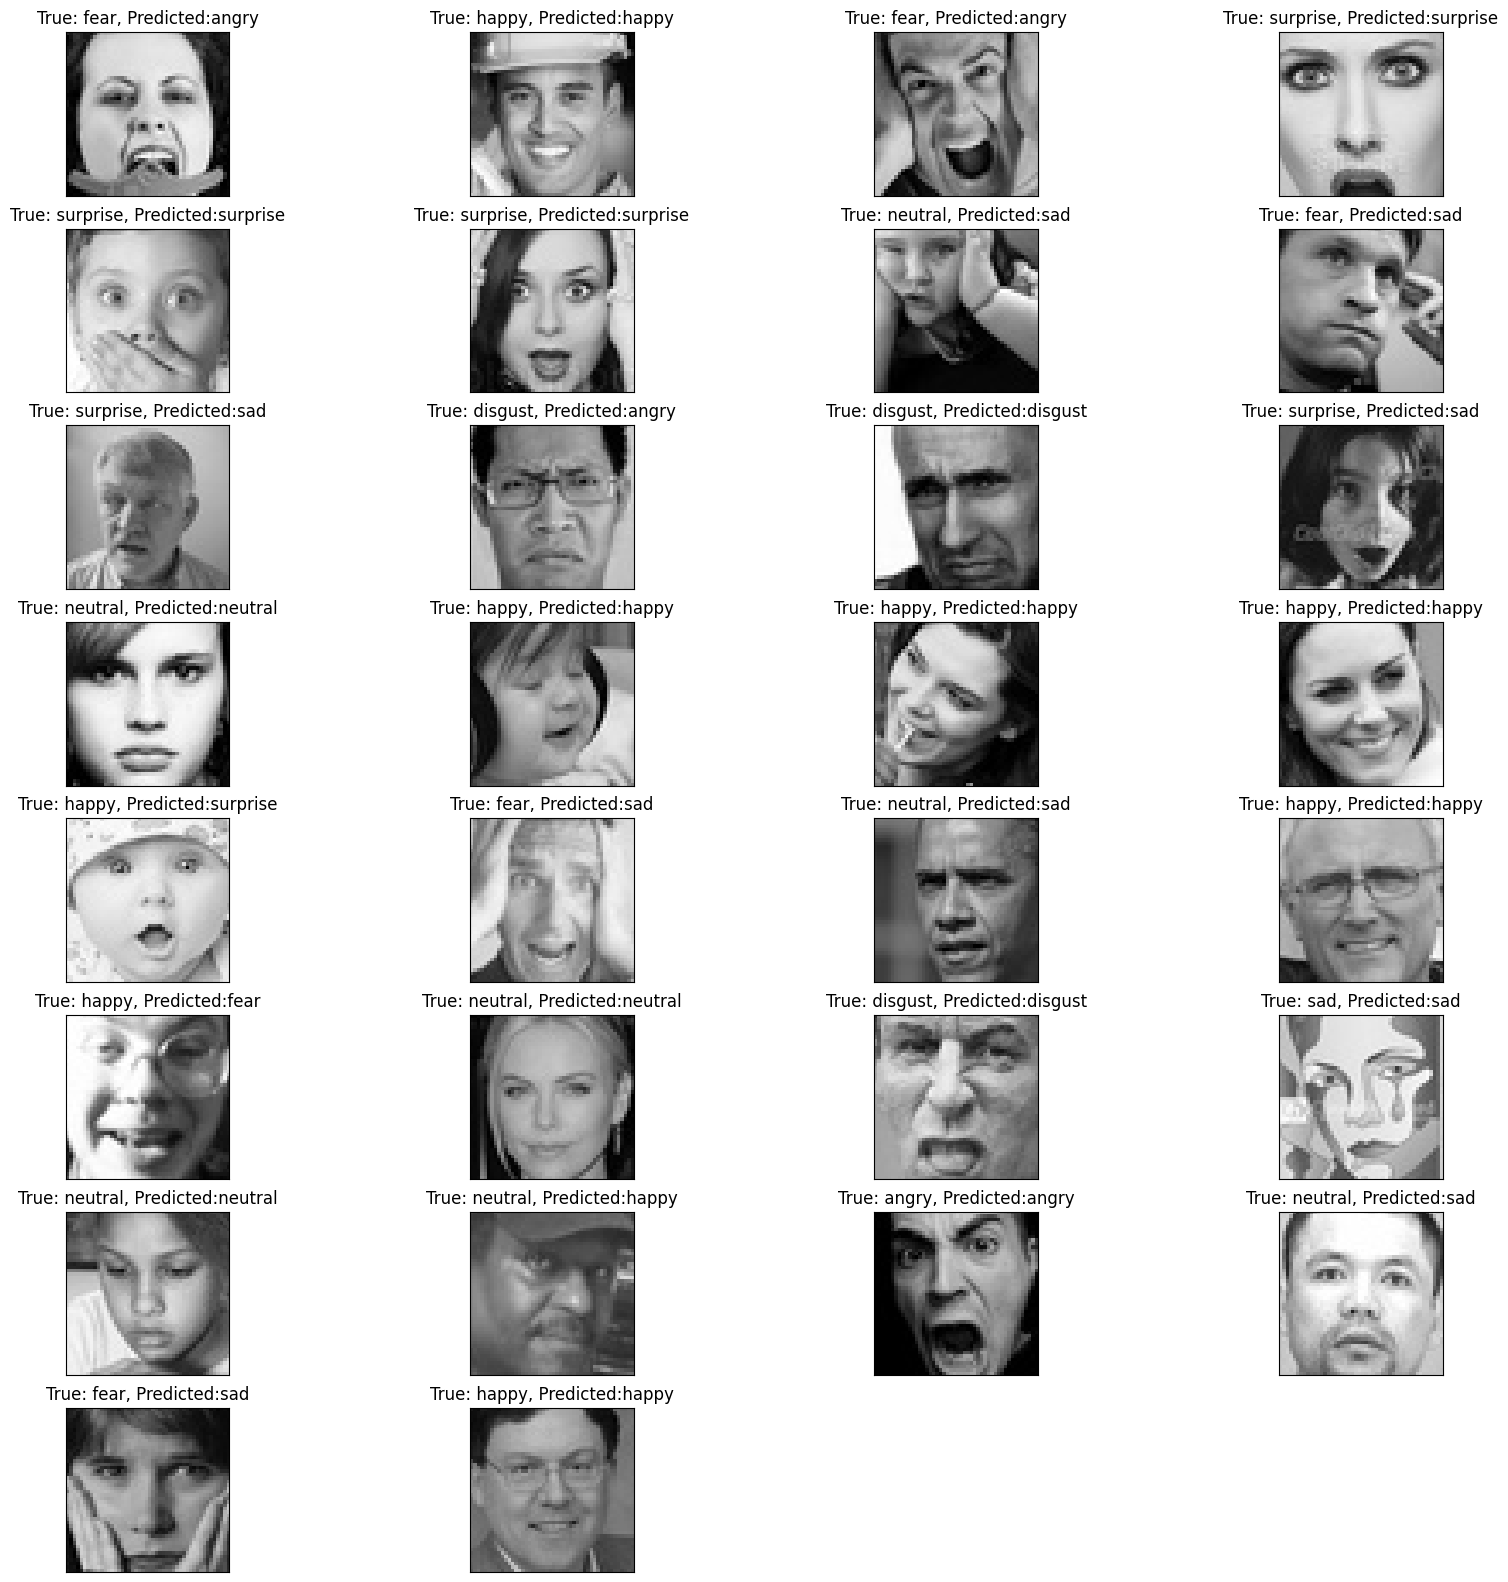

In [ ]:
test_model(resnet_model)

## MobileNet

MobileNet is a lightweight deep learning architecture designed for efficient on-device processing in applications like smartphones and embedded systems. It employs depth-wise separable convolutions, reducing the number of parameters while maintaining accuracy. MobileNet variants like MobileNetV2 and MobileNetV3 have further improved efficiency and performance. These models excel in tasks such as image classification, object detection, and more, making them ideal for resource-constrained devices. MobileNet's ability to balance computational efficiency and accuracy has made it a popular choice for real-time image processing, enabling applications like mobile photography and computer vision on edge devices.

### Modelling

In [ ]:
image_size = (48, 48)
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 48820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [ ]:
mobilenet_model = tf.keras.models.Sequential()
mobilenet_model.add(mobilenet_base_model)
mobilenet_model.add(GlobalMaxPooling2D())
mobilenet_model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.07)))
mobilenet_model.add(Dropout(0.6))
mobilenet_model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.07)))
mobilenet_model.add(Dense(7, activation='softmax'))

In [ ]:
mobilenet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 1, 1, 1024)        3228864   
 onal)                                                           
                                                                 
 global_max_pooling2d_3 (Gl  (None, 1024)              0         
 obalMaxPooling2D)                                               
                                                                 
 dense_12 (Dense)            (None, 20)                20500     
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 7)                

In [ ]:
mobilenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
mobilenet_history = mobilenet_model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20
)

Epoch 1/20
763/763 [==============================] - 94s 123ms/step - loss: 0.8746 - accuracy: 0.7255 - val_loss: 1.3076 - val_accuracy: 0.6037
Epoch 2/20
763/763 [==============================] - 91s 120ms/step - loss: 0.8518 - accuracy: 0.7369 - val_loss: 1.4176 - val_accuracy: 0.5751
Epoch 3/20
763/763 [==============================] - 91s 120ms/step - loss: 0.8194 - accuracy: 0.7485 - val_loss: 1.3007 - val_accuracy: 0.6056
Epoch 4/20
763/763 [==============================] - 92s 120ms/step - loss: 0.7888 - accuracy: 0.7638 - val_loss: 1.3320 - val_accuracy: 0.5785
Epoch 5/20
763/763 [==============================] - 91s 120ms/step - loss: 0.7595 - accuracy: 0.7753 - val_loss: 1.4340 - val_accuracy: 0.5221
Epoch 6/20
763/763 [==============================] - 92s 120ms/step - loss: 0.7491 - accuracy: 0.7830 - val_loss: 1.5522 - val_accuracy: 0.5549
Epoch 7/20
763/763 [==============================] - 90s 118ms/step - loss: 0.7170 - accuracy: 0.7962 - val_loss: 1.4740 - val_ac

In [ ]:
mobilenet_test_loss, mobilenet_test_accuracy = mobilenet_model.evaluate(test_generator)

111/111 [==============================] - 11s 98ms/step - loss: 1.6494 - accuracy: 0.5691


In [ ]:
print(f"Test Loss: {mobilenet_test_loss:.2f}")
print(f"Train Accuracy: {mobilenet_history.history['accuracy'][-1] * 100:.2f}%")
print(f"Test Accuracy: {mobilenet_test_accuracy * 100:.2f}%")

Test Loss: 1.65
Train Accuracy: 86.38%
Test Accuracy: 56.91%


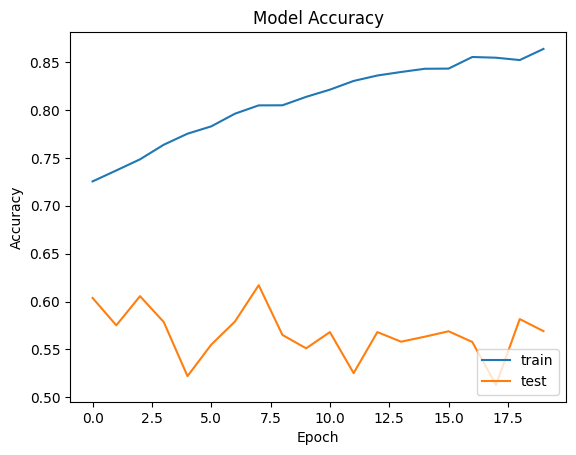

In [ ]:
plt.plot(mobilenet_history.history['accuracy'])
plt.plot(mobilenet_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
mobilenet_model.save('mobilenet_model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/emotion_detection/mobilenet_model.h5')

### Testing

1/1 [==============================] - 0s 19ms/step


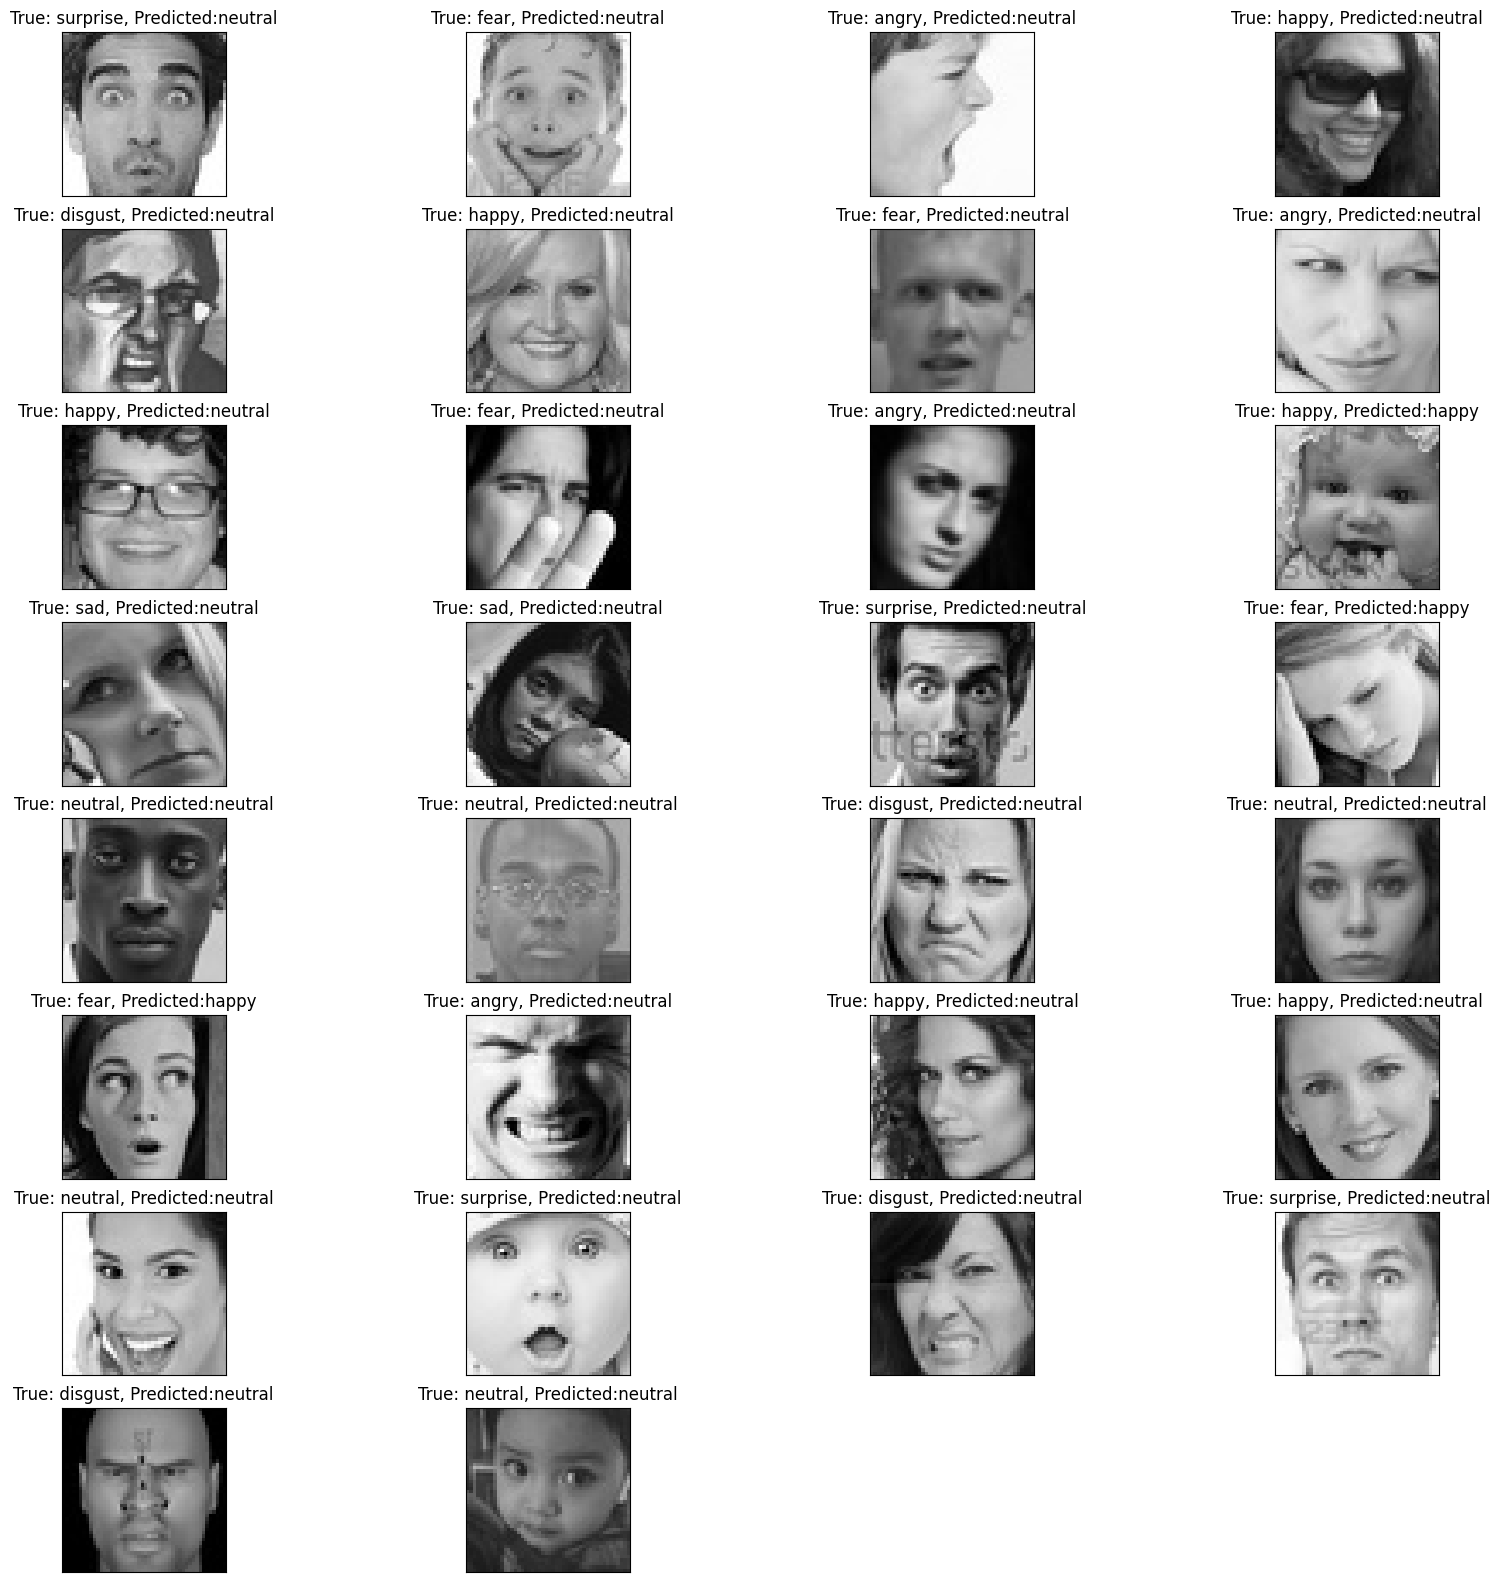

In [ ]:
test_model(model)

## EfficientNet

EfficientNet is a family of neural network architectures that balance computational efficiency and model accuracy. It introduces a compound scaling method that uniformly scales network depth, width, and resolution. This allows EfficientNet models to perform exceptionally well while being highly resource-efficient, making them suitable for various applications on edge devices and cloud platforms. EfficientNet has achieved state-of-the-art results in image classification tasks and has been widely adopted in areas like computer vision and transfer learning. Its adaptability to different resource constraints and tasks has made it a go-to choice for developing efficient deep learning models.

### Modelling

In [ ]:
efficientnet_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

16804768/16804768 [==============================] - 0s 0us/step


In [ ]:
x = efficientnet_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(no_of_classes, activation='softmax')(x)

In [ ]:
efficientnet_model = Model(inputs=efficientnet_base_model.input, outputs=predictions)

In [ ]:
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/emotion_detection/data/images/train',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/emotion_detection/data/images/test',
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 48820 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

In [ ]:
efficientnet_history = efficientnet_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
763/763 [==============================] - 143s 187ms/step - loss: 1.3116 - accuracy: 0.5065 - val_loss: 1.1555 - val_accuracy: 0.5593
Epoch 2/20
763/763 [==============================] - 125s 164ms/step - loss: 1.0597 - accuracy: 0.6036 - val_loss: 1.1056 - val_accuracy: 0.5978
Epoch 3/20
763/763 [==============================] - 126s 165ms/step - loss: 0.9261 - accuracy: 0.6556 - val_loss: 1.0945 - val_accuracy: 0.6046
Epoch 4/20
763/763 [==============================] - 139s 182ms/step - loss: 0.8256 - accuracy: 0.6951 - val_loss: 1.1644 - val_accuracy: 0.5948
Epoch 5/20
763/763 [==============================] - 135s 177ms/step - loss: 0.7365 - accuracy: 0.7282 - val_loss: 1.1060 - val_accuracy: 0.6112
Epoch 6/20
763/763 [==============================] - 136s 178ms/step - loss: 0.6547 - accuracy: 0.7605 - val_loss: 1.1299 - val_accuracy: 0.6192
Epoch 7/20
763/763 [==============================] - 128s 167ms/step - loss: 0.5804 - accuracy: 0.7902 - val_loss: 1.1467 -

In [ ]:
efficientnet_model.save('efficientnet_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


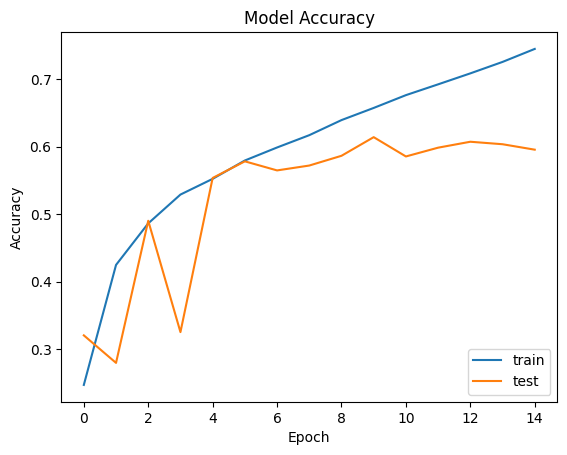

In [ ]:
plt.plot(efficientnet_history.history['accuracy'])
plt.plot(efficientnet_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
effnet_model = tf.keras.models.load_model('/content/drive/MyDrive/emotion_detection/efficientnet_model.h5')

In [ ]:
effnet_test_loss, effnet_test_accuracy = effnet_model.evaluate(validation_generator)

111/111 [==============================] - 15s 114ms/step - loss: 1.0945 - accuracy: 0.6046


### Testing

1/1 [==============================] - 0s 29ms/step


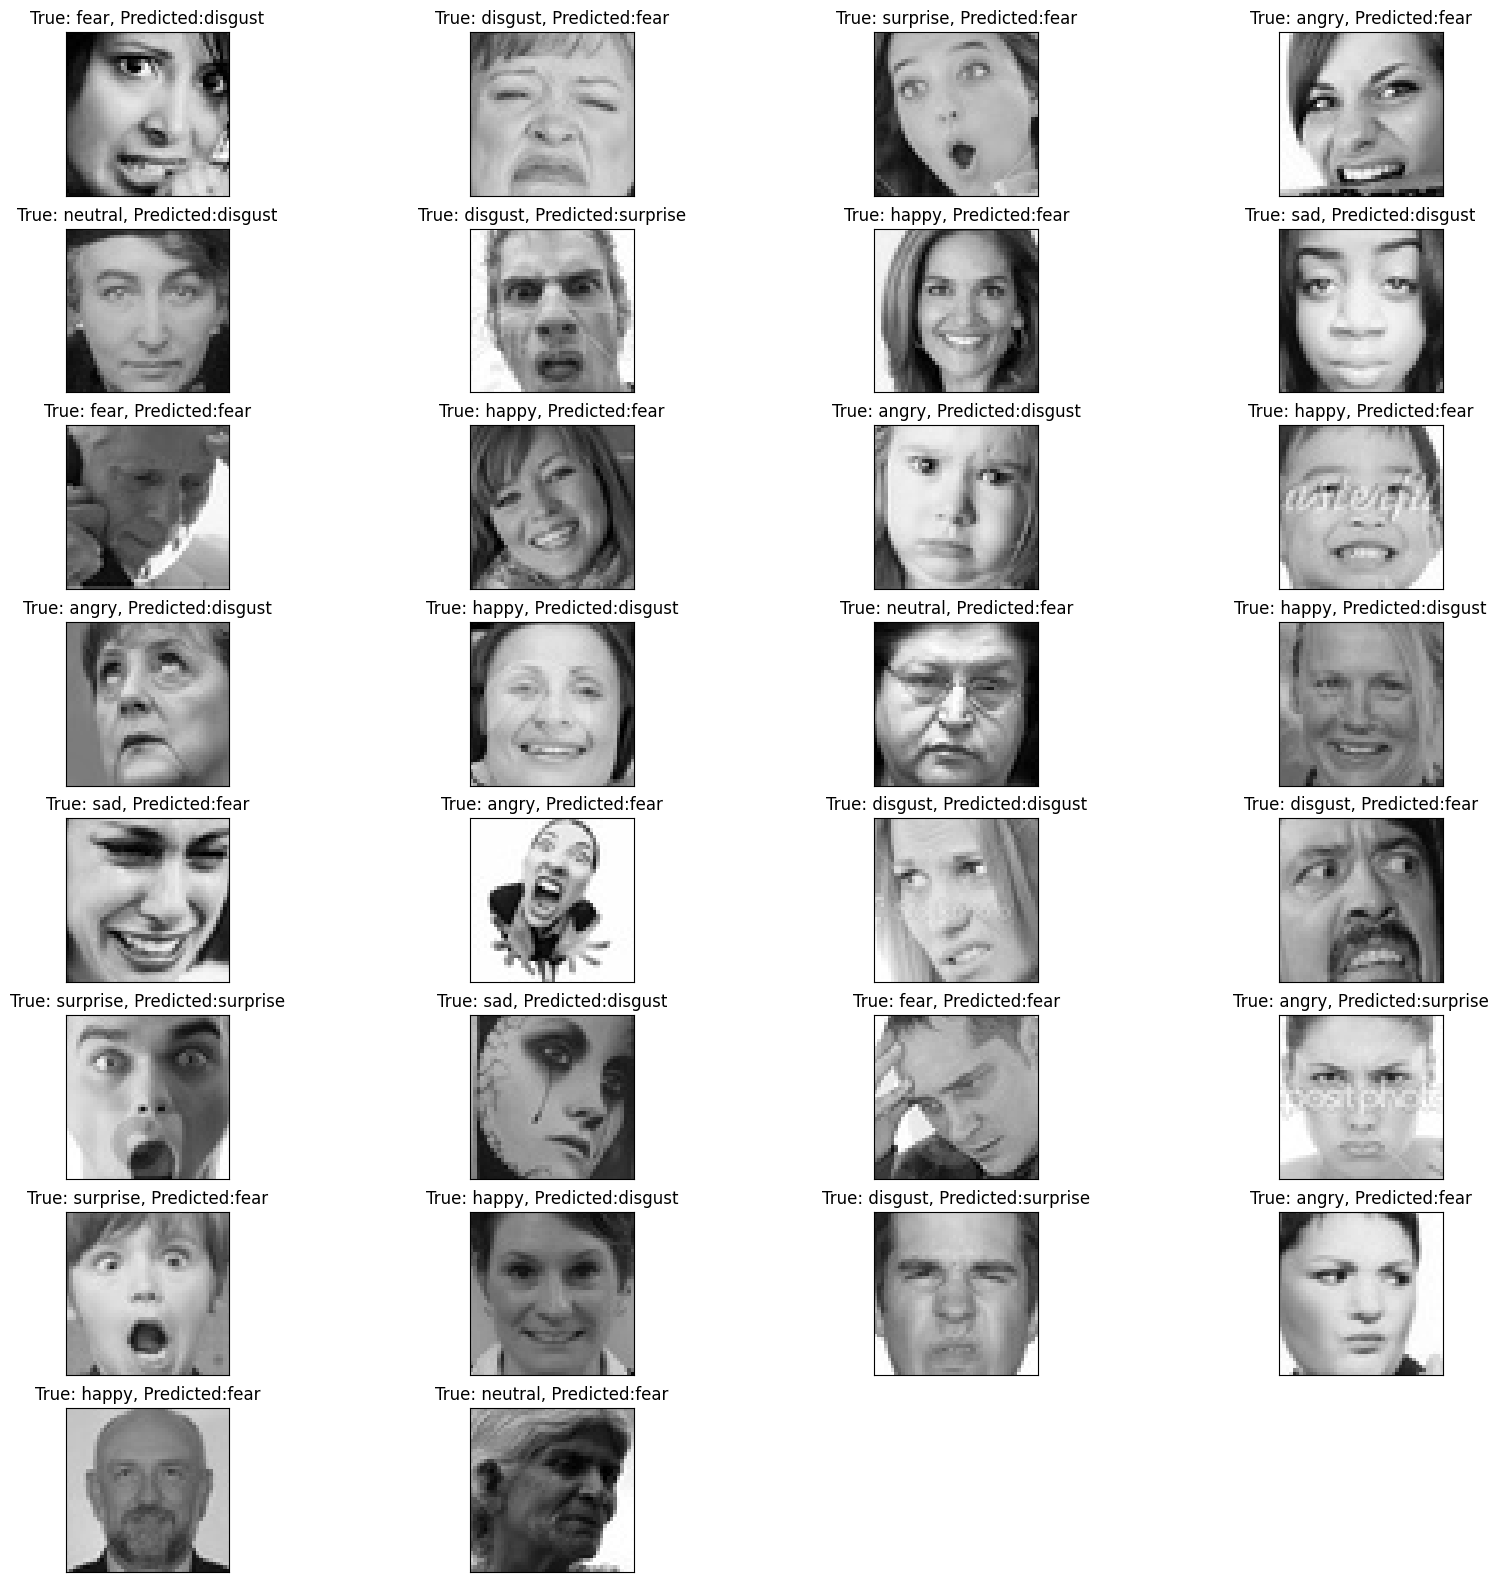

In [ ]:
test_model(efficientnet_model)

## CNN

### Modelling

In [ ]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 3)))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(256, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(512, (3, 3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(512))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(512))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(7, activation='softmax'))

In [ ]:
optimizer = Adam(learning_rate=0.001)

In [ ]:
cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

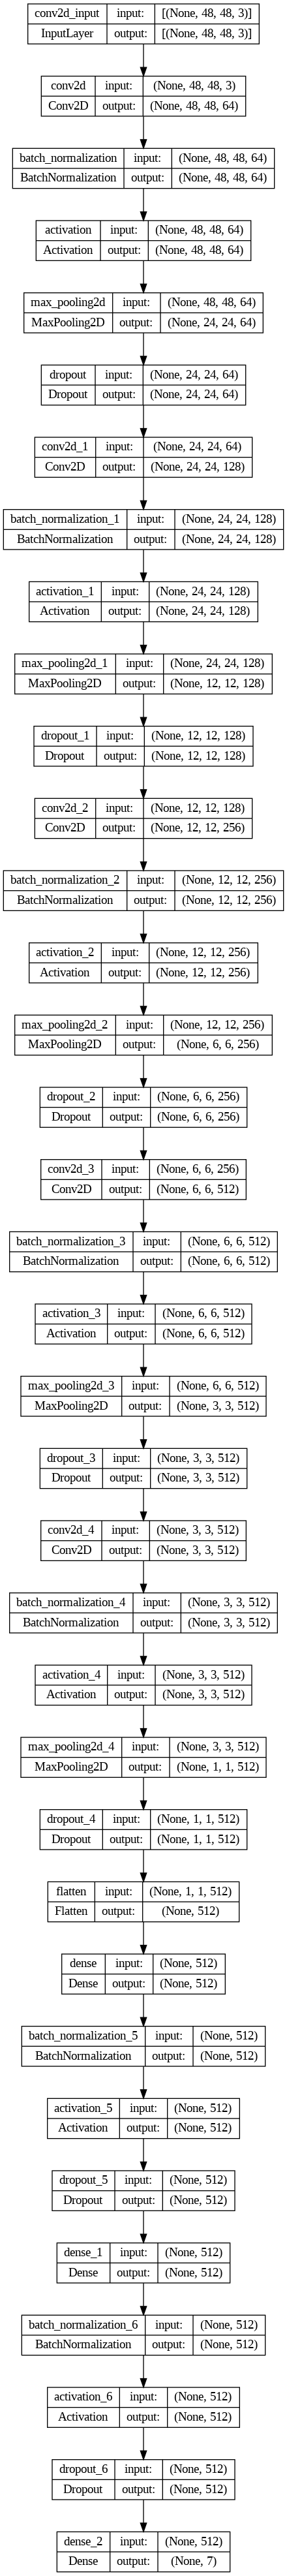

In [ ]:
set_config(display="diagram")
plot_model(cnn_model, to_file='cnn_model_diagram.png', show_shapes=True, show_layer_names = True)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.0001)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 48821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
cnn_history = cnn_model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
763/763 [==============================] - 144s 166ms/step - loss: 1.9652 - accuracy: 0.2471 - val_loss: 1.7943 - val_accuracy: 0.3205
Epoch 2/20
763/763 [==============================] - 107s 140ms/step - loss: 1.4936 - accuracy: 0.4249 - val_loss: 2.0327 - val_accuracy: 0.2798
Epoch 3/20
763/763 [==============================] - 105s 137ms/step - loss: 1.3422 - accuracy: 0.4864 - val_loss: 1.3325 - val_accuracy: 0.4902
Epoch 4/20
763/763 [==============================] - 115s 151ms/step - loss: 1.2520 - accuracy: 0.5291 - val_loss: 1.9174 - val_accuracy: 0.3254
Epoch 5/20
763/763 [==============================] - 117s 153ms/step - loss: 1.1817 - accuracy: 0.5523 - val_loss: 1.2112 - val_accuracy: 0.5536
Epoch 6/20
763/763 [==============================] - 117s 153ms/step - loss: 1.1175 - accuracy: 0.5795 - val_loss: 1.1319 - val_accuracy: 0.5783
Epoch 7/20
763/763 [==============================] - 117s 153ms/step - loss: 1.0665 - accuracy: 0.5988 - val_loss: 1.1724 -

In [ ]:
cnn_model.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(validation_generator)

111/111 [==============================] - 13s 114ms/step - loss: 1.0659 - accuracy: 0.6141


In [ ]:
print(f'Test Loss: {cnn_test_loss:.2f}')
print(f'Test Accuracy: {cnn_test_accuracy:.2%}')

Test Loss: 1.07
Test Accuracy: 61.41%


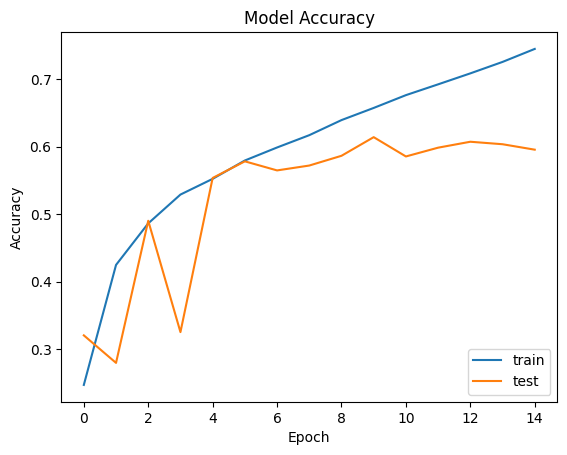

In [ ]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

### Testing

1/1 [==============================] - 0s 20ms/step


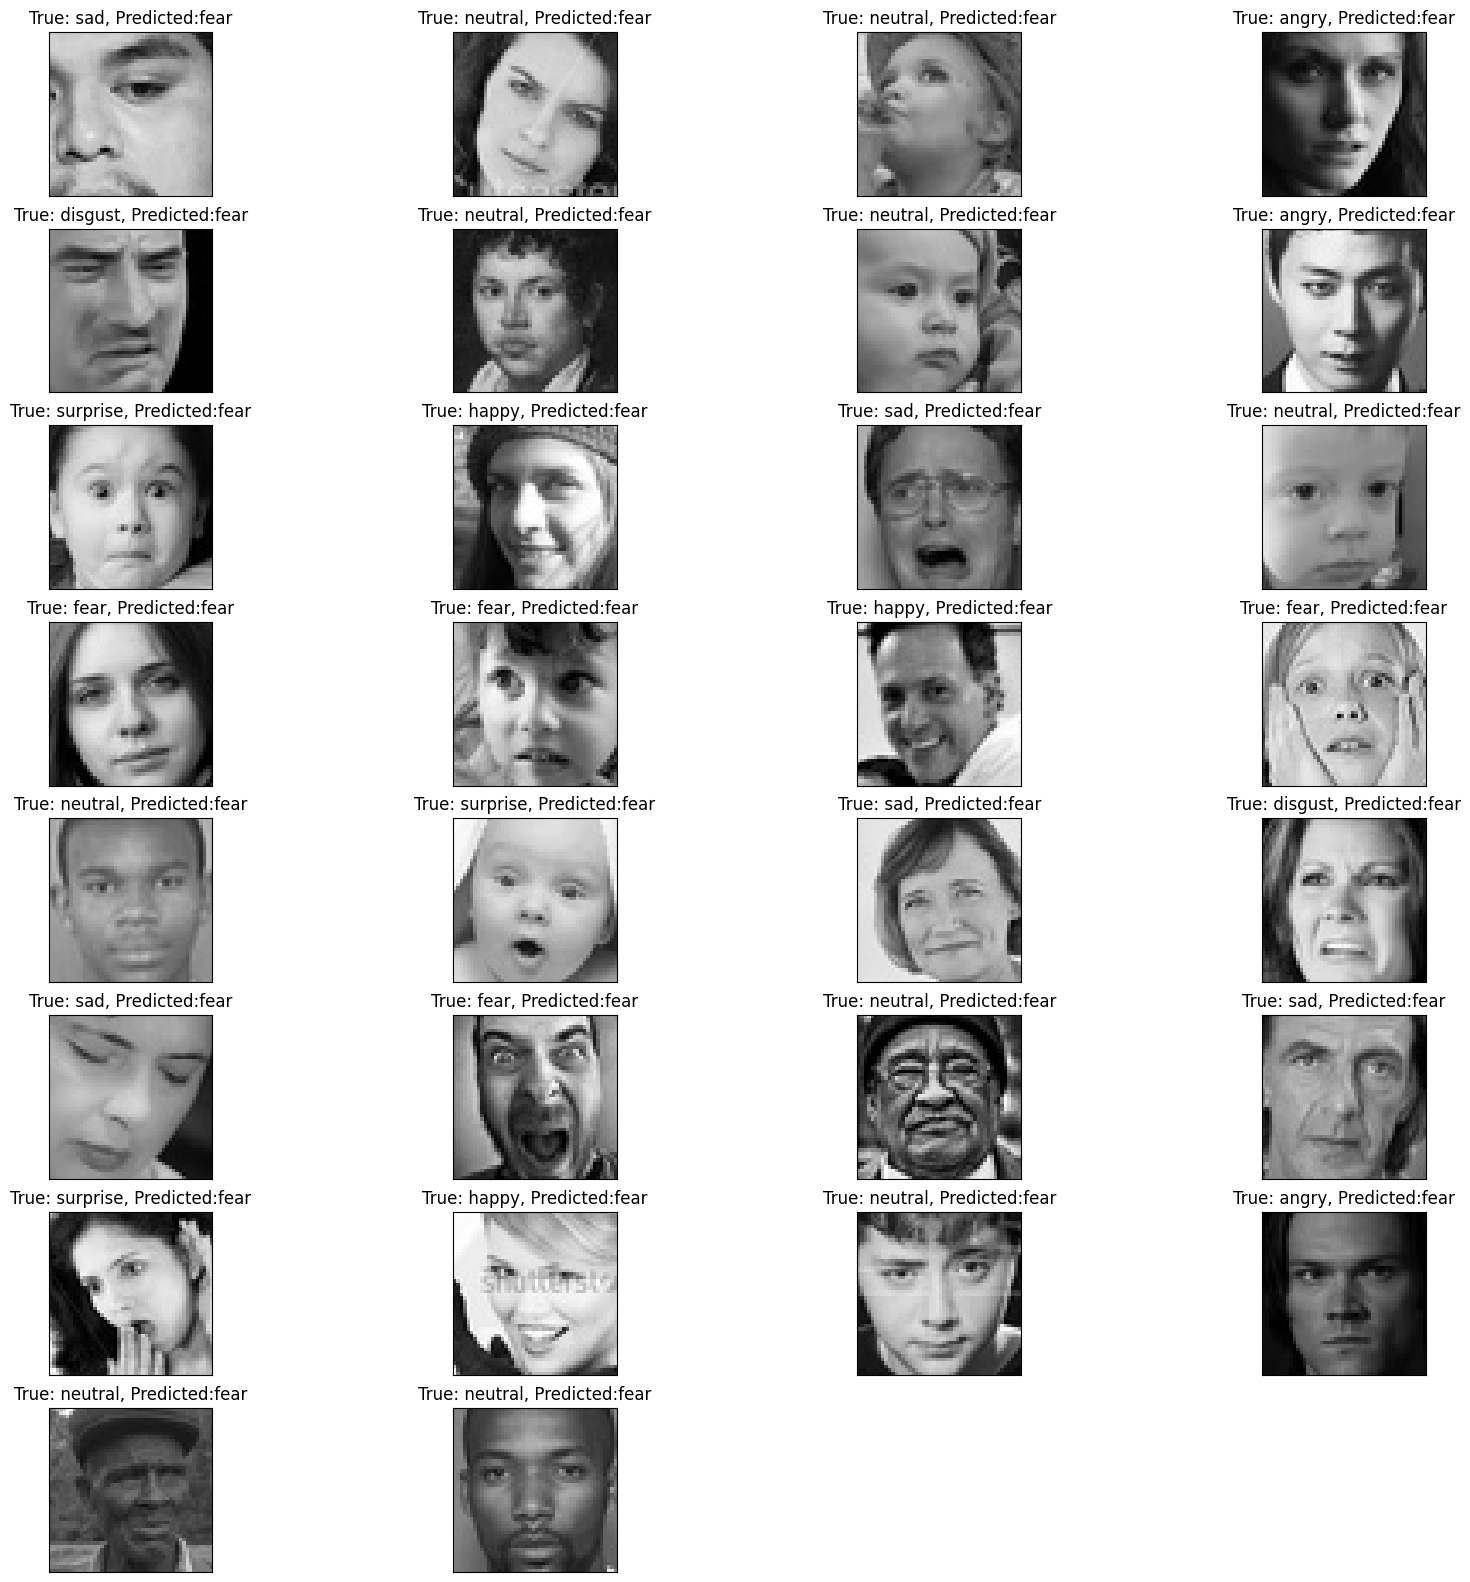

In [ ]:
test_model(cnn_model)

## Comparitive Analysis

In [1]:
model_names = ["CNN", "ResNet50", "MobileNet", "EfficientNet"]
accuracies = [0.6141, 0.5143, 0.5691, 0.6046]
loss = [1.07, 1.37, 1.65, 1.09]

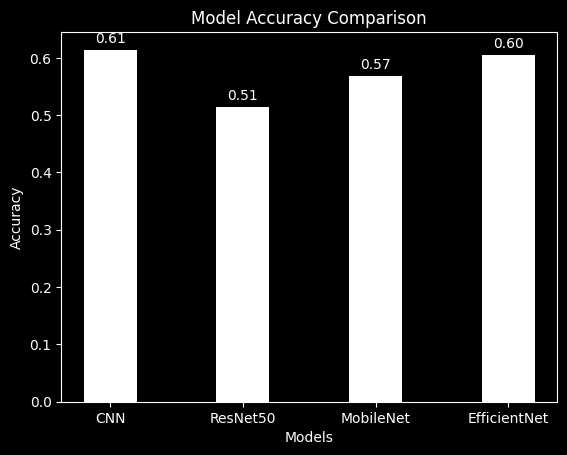

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
bars = ax.bar(model_names, accuracies, width=0.4, color='white')
plt.xlabel('Models', color='white')
plt.ylabel('Accuracy', color='white')
plt.title('Model Accuracy Comparison', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', color='white')
plt.show()

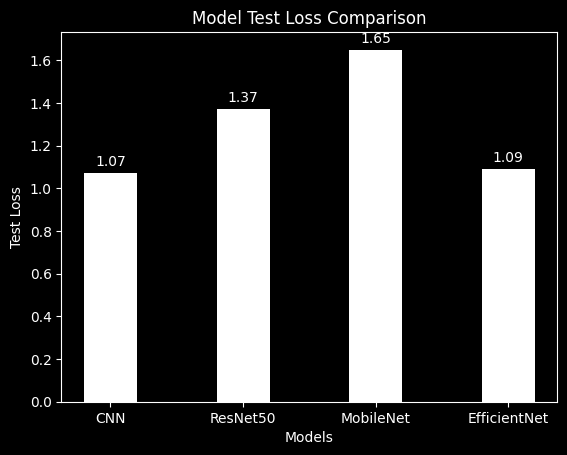

In [5]:
plt.style.use('dark_background')
fig, ax = plt.subplots()
bars = ax.bar(model_names, loss, width=0.4, color='white')
plt.xlabel('Models', color='white')
plt.ylabel('Test Loss', color='white')
plt.title('Model Test Loss Comparison', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', color='white')
plt.show()